In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("amp_by_current_and_voltage.csv")
data

,voltage[V],current[A],amp[muV]
0,0.0,0.00,-2.2
1,0.5,0.05,-3.5
2,1.0,0.09,-3.2
3,1.5,0.14,-3.8
4,1.9,0.18,-5.8
...,...,...,...
106,-25.5,1.87,149.2
107,-26.1,1.89,150.3
108,-26.5,1.92,152.5
109,-27.1,1.94,153.1


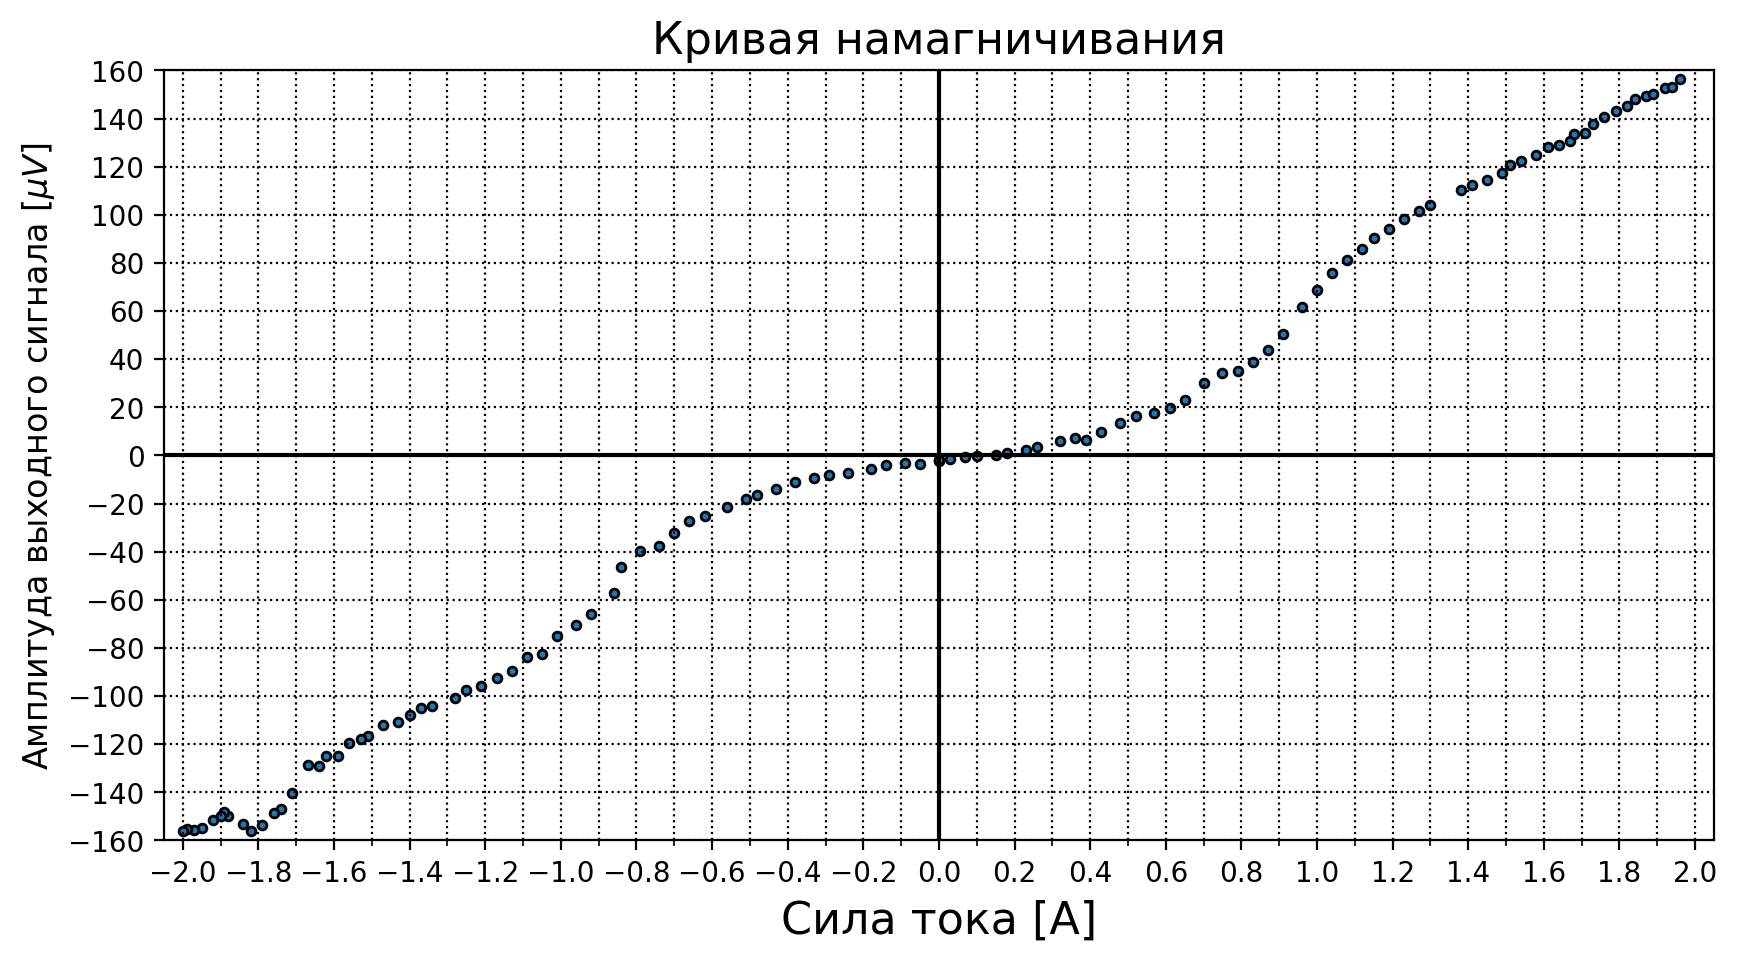

In [3]:
plt.figure(figsize = (10, 5), dpi = 200)
plt.axvline(0, color = 'black')
plt.axhline(0, color = 'black')
plt.scatter(-np.sign(data['voltage[V]']) * data['current[A]'], data['amp[muV]'], edgecolors='black', s = 10)
plt.xlabel("Сила тока [А]", fontsize = 16)
plt.ylabel(r"Амплитуда выходного сигнала [$\mu V$]", fontsize = 12)
plt.title("Кривая намагничивания", fontsize = 16)
plt.xticks(np.arange(-2, 2.1, 0.1), minor = True)
plt.xticks(np.arange(-2, 2.2, 0.2))
plt.yticks(np.arange(-160, 200, 20))
plt.ylim(-160, 160)
plt.xlim(-2.05, 2.05)
plt.grid(which = 'both', color = 'black', ls = ':')